In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
from scipy.optimize import curve_fit

In [2]:
# Loading data
dataarray_SST_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_sst_piControl_interp_2x2_15memens_3.nc')
dataarray_SST_cont.load()

dataarray_Qo_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_ocean_piControl_2x2_15memens_2.nc')
dataarray_Qo_cont.load()

dataarray_Qs_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_surface_piControl_2x2_15memens_2.nc')
dataarray_Qs_cont.load()

dataarray_Qt_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_toa_piControl_2x2_15memens_3.nc')
dataarray_Qt_cont.load()

dataarray_Qh_cont = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_horiz_piControl_2x2_15memens.nc')
dataarray_Qh_cont.load()

Qo_yearlymlotst = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_oceanflux_piControl_yearlymean.nc')
Qo_yearlymlotst.load()

coeffs = xr.open_dataarray('/data/keeling/a/mailes2/a/processed_var_data/CMIP_regress_coeffs.nc')
coeffs.load()

vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/vert_ds.nc')
vert_ds.load()

<xarray.DataArray 'wap' (lat: 88, lon: 179)>
array([[ 9.05317347e-03,  5.35726221e-03,  3.90954921e-03, ...,
         1.37608778e-02,  1.27784014e-02,  1.16651980e-02],
       [ 1.62603296e-02,  1.84076093e-02,  1.68463495e-02, ...,
         2.34749150e-02,  2.32172329e-02,  2.24996507e-02],
       [ 1.72343142e-02,  1.73817184e-02,  1.67526975e-02, ...,
         1.50780585e-02,  1.46754114e-02,  1.46230198e-02],
       ...,
       [-2.22924957e-03, -1.80104235e-03, -1.62051118e-03, ...,
        -1.75005000e-03, -2.10483326e-03, -2.04990618e-03],
       [-6.93217677e-04, -1.27934688e-03, -1.30213355e-03, ...,
        -7.43095938e-04, -8.93206510e-04, -9.83634265e-04],
       [ 4.50923544e-04, -8.85086847e-05,  6.49775393e-05, ...,
        -5.63950336e-04, -4.56162205e-04, -3.77876189e-04]], dtype=float32)
Coordinates:
    plev     float64 5e+04
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

# Calculating anomalies

In [3]:
# Calculating Anomalies

# Remove seasonality
climatology_sst = dataarray_SST_cont.groupby('time.month').mean('time')
T_anomalies = dataarray_SST_cont.groupby('time.month') - climatology_sst
T_minusone_prime = T_anomalies.isel(time=slice(0,1499))
T_prime = T_anomalies.shift(time=-1).isel(time=slice(0,1499))

climatology_Qs = dataarray_Qs_cont.groupby('time.month').mean('time')
Qs_anomalies = dataarray_Qs_cont.groupby('time.month') - climatology_Qs
Qs_prime = Qs_anomalies.shift(time=-1).isel(time=slice(0,1499))
            
climatology_Qo = dataarray_Qo_cont.groupby('time.month').mean('time')
Qo_anomalies = dataarray_Qo_cont.groupby('time.month') - climatology_Qo
Qo_prime = Qo_anomalies.shift(time=-1).isel(time=slice(0,1499))

climatology_Qo_yr = Qo_yearlymlotst.groupby('time.month').mean('time')
Qo_anomalies_yr = Qo_yearlymlotst.groupby('time.month') - climatology_Qo_yr
Qo_prime_yr = Qo_anomalies_yr.shift(time=-1).isel(time=slice(0,1499))

climatology_Qt = dataarray_Qt_cont.groupby('time.month').mean('time')
Qt_anomalies = dataarray_Qt_cont.groupby('time.month') - climatology_Qt
Qt_prime = Qt_anomalies.shift(time=-1).isel(time=slice(0,1499))

climatology_Qh = dataarray_Qh_cont.groupby('time.month').mean('time')
Qh_anomalies = dataarray_Qh_cont.groupby('time.month') - climatology_Qh
Qh_prime = Qh_anomalies.shift(time=-1).isel(time=slice(0,1499))

# Surface Feedbacks

In [4]:
lambda_s_num = Qs_prime*T_minusone_prime

lambda_s_den = T_prime*T_minusone_prime

In [5]:
lambda_s = -lambda_s_num.mean('time')/lambda_s_den.mean('time')

Text(0.5, 1.0, 'lambda_s (N=15)')

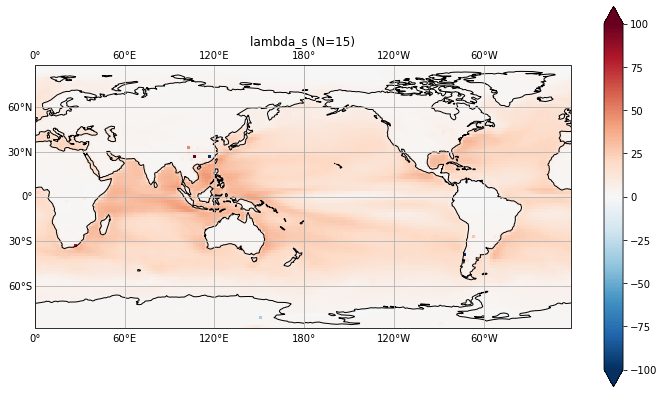

In [6]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_s (N=15)')

Text(0.5, 1.0, 'lambda_s (N=15)')

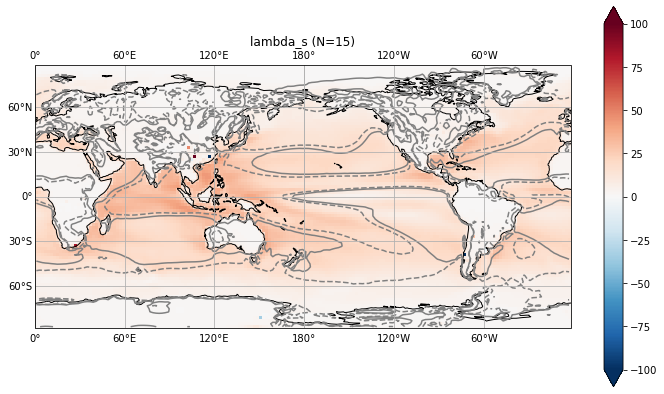

In [7]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_s (N=15)')

Text(0.5, 1.0, 'lambda_s (N=15)')

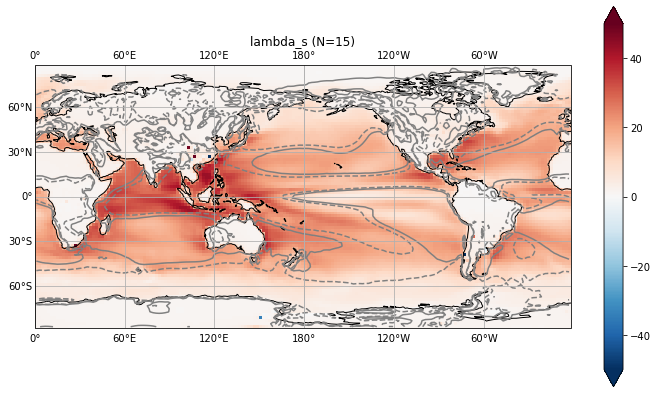

In [29]:
#### plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_s (N=15)')

Text(0.5, 1.0, 'lambda_s (N=15)')

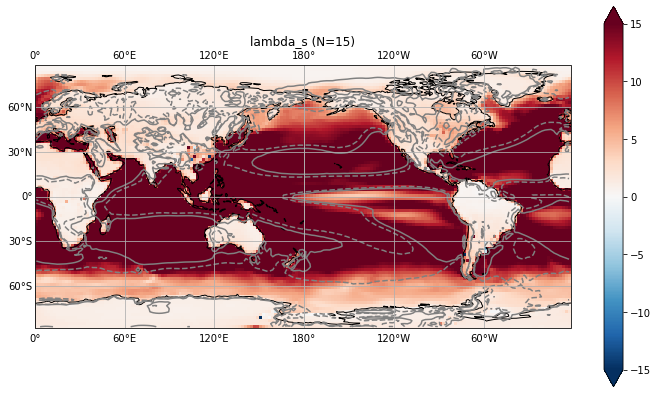

In [6]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-15, vmax=15, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_s (N=15)')

# Ocean feedbacks - monthly mlotst

In [6]:
lambda_o_num = Qo_prime*T_minusone_prime

lambda_o_den = T_prime*T_minusone_prime

In [7]:
lambda_o = -lambda_o_num.mean('time')/lambda_o_den.mean('time')

Text(0.5, 1.0, 'lambda_o (N=15)')

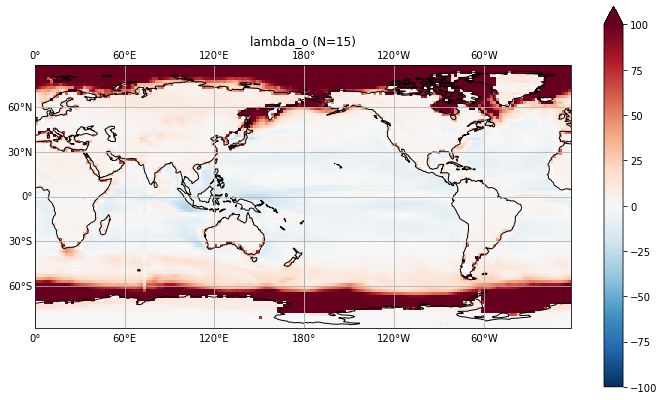

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_o.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_o (N=15)')

Text(0.5, 1.0, 'lambda_o (N=15)')

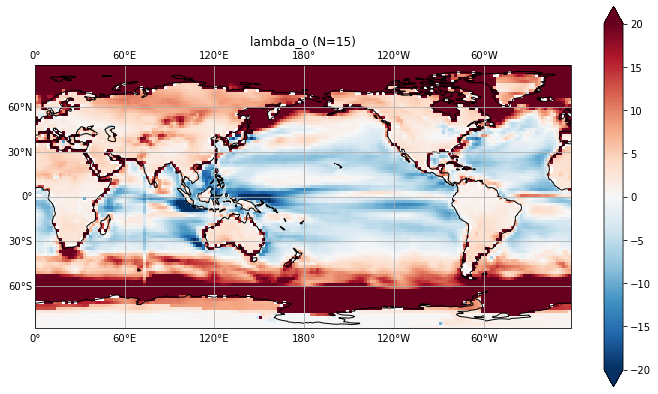

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_o.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-20, vmax=20, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_o (N=15)')

Text(0.5, 1.0, 'lambda_o (N=15)')

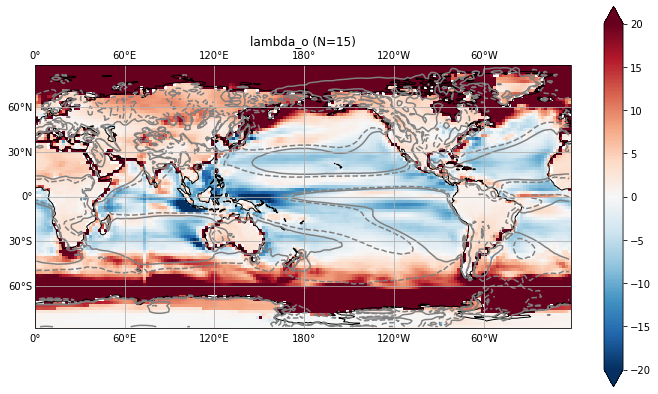

In [10]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_o.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-20, vmax=20, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_o (N=15)')

# Ocean feedbacks - yearly mlotst

In [8]:
lambda_o_num_yr = Qo_prime_yr*T_minusone_prime

lambda_o_den = T_prime*T_minusone_prime

In [9]:
lambda_o_yr = -lambda_o_num_yr.mean('time')/lambda_o_den.mean('time')

Text(0.5, 1.0, 'lambda_o (N=15)')

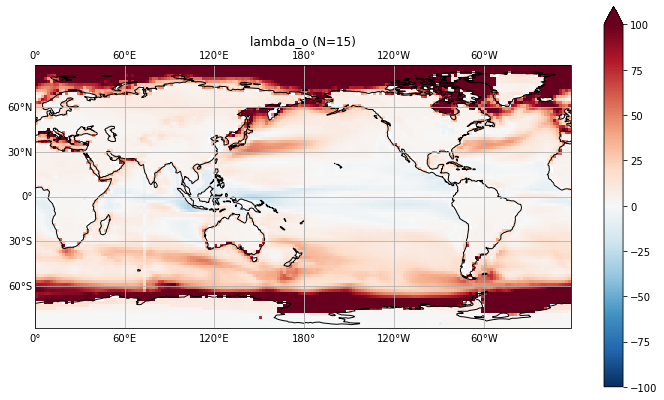

In [9]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_o_yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_o (N=15)')

# TOA feedbacks

In [10]:
lambda_t_num = Qt_prime*T_minusone_prime

lambda_t_den = T_prime*T_minusone_prime

In [11]:
lambda_t = -lambda_t_num.mean('time')/lambda_t_den.mean('time')

Text(0.5, 1.0, 'lambda_t (N=15)')

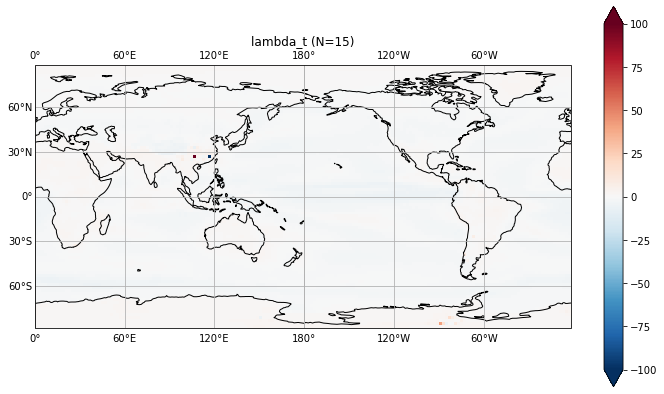

In [7]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_t.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_t (N=15)')

Text(0.5, 1.0, 'lambda_t (N=15)')

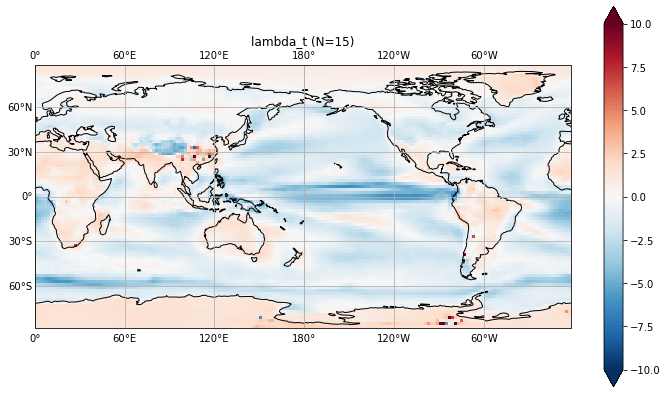

In [7]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_t.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_t (N=15)')

# Horiz. Flux Feedbacks

In [12]:
lambda_h_num = Qh_prime*T_minusone_prime

lambda_h_den = T_prime*T_minusone_prime

In [13]:
lambda_h = -lambda_h_num.mean('time')/lambda_h_den.mean('time')

Text(0.5, 1.0, 'lambda_h (N=15)')

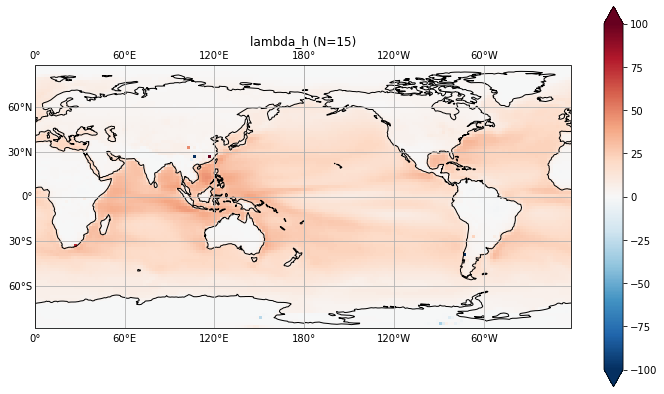

In [13]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_h.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-100, vmax=100, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('lambda_h (N=15)')

Text(0.5, 1.0, 'lambda_h (N=15)')

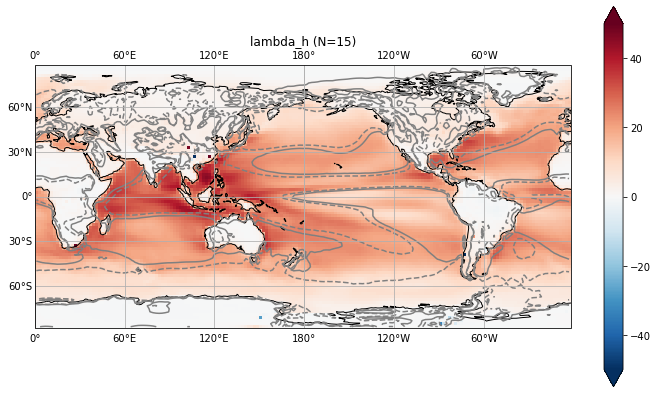

In [16]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lambda_h.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-50, vmax=50, cmap='RdBu_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.gridlines(draw_labels=True)
plt.title('lambda_h (N=15)')

# Compiled figure

Text(0.5, 1.0, 'lambda_h (N=15)')

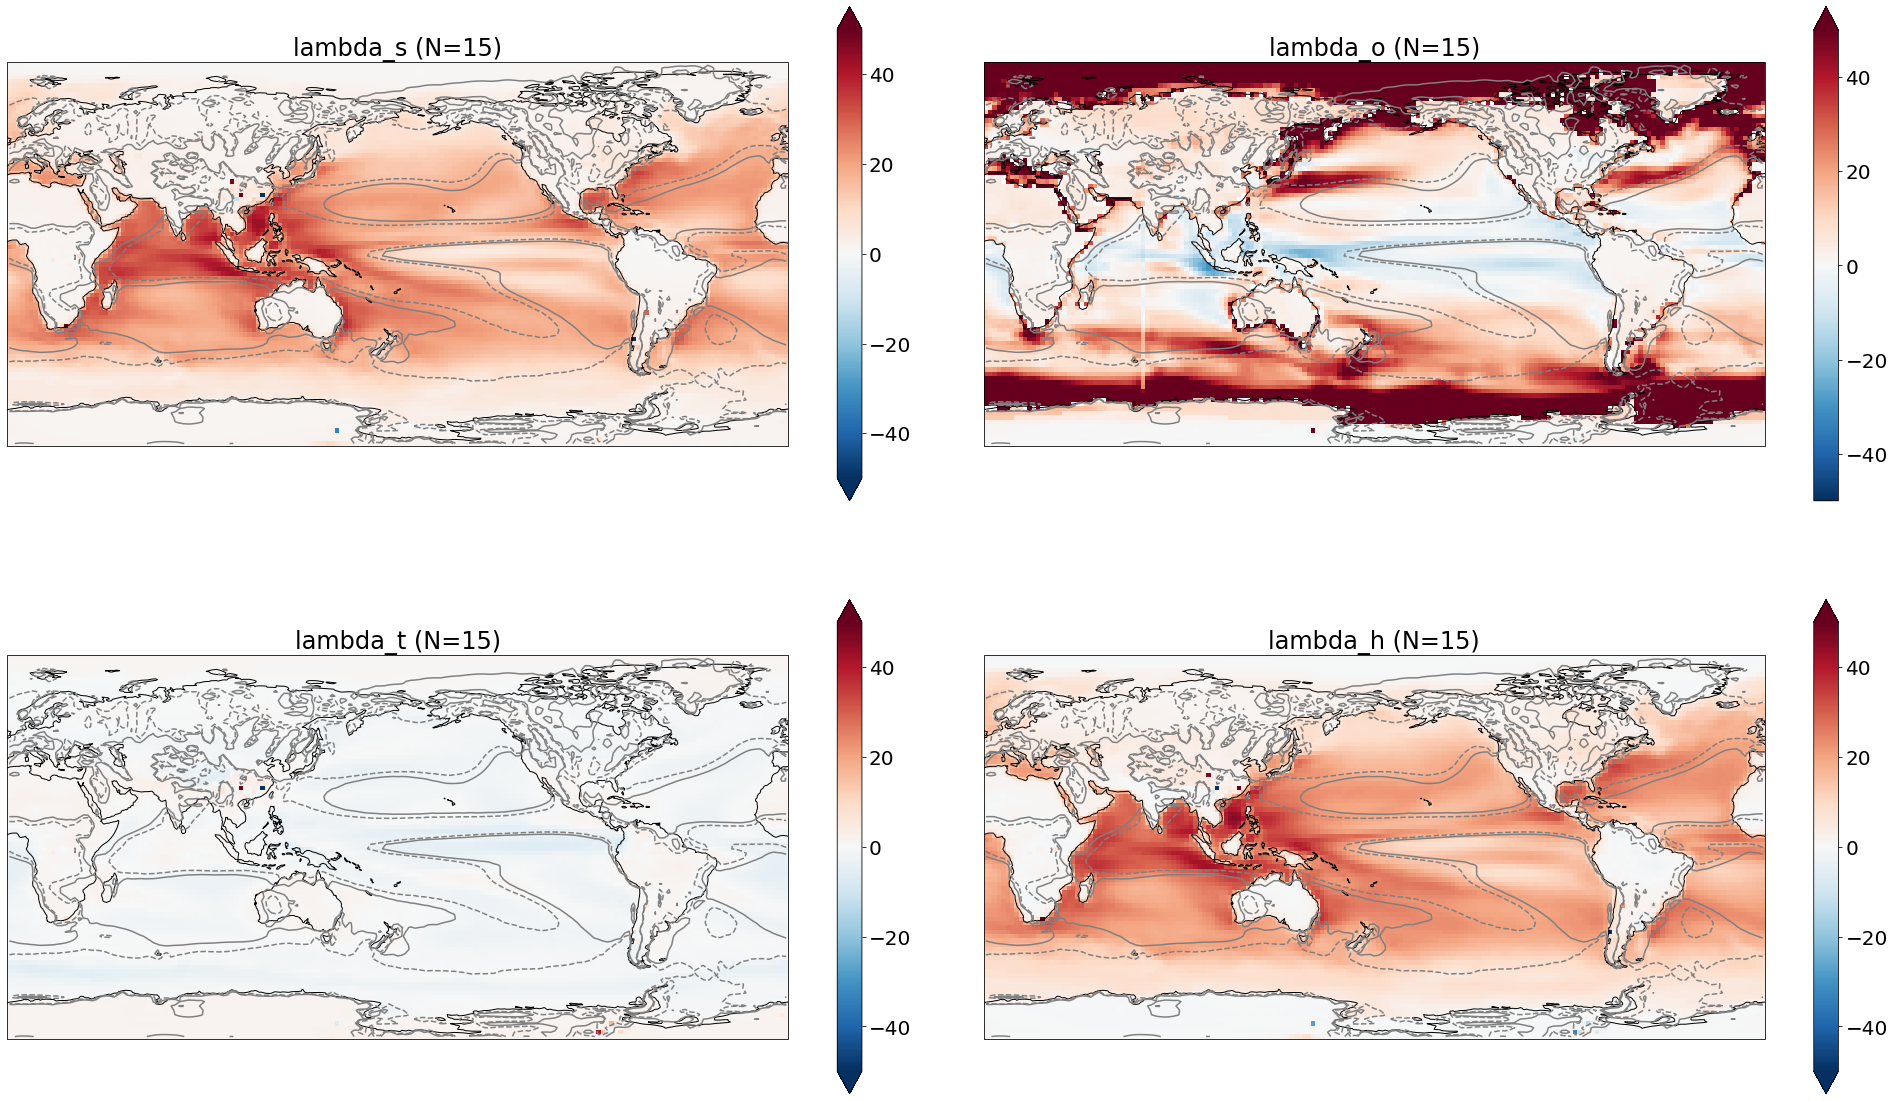

In [22]:
fig = plt.figure(figsize=(35, 20))
gs = gridspec.GridSpec(2, 2, width_ratios=[2,2])
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

vmin = -50
vmax = 50

ax1 = fig.add_subplot(gs[0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdBu_r')
ax1.coastlines(color='black', linewidth=1)
#ax1.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_s (N=15)')

ax2 = fig.add_subplot(gs[1], projection=ccrs.PlateCarree(central_longitude=180))
lambda_o_yr.mean('name').plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdBu_r')
ax2.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_o (N=15)')

ax3 = fig.add_subplot(gs[2], projection=ccrs.PlateCarree(central_longitude=180))
lambda_t.mean('name').plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdBu_r')
ax3.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_t (N=15)')

ax4 = fig.add_subplot(gs[3], projection=ccrs.PlateCarree(central_longitude=180))
lambda_h.mean('name').plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, cmap='RdBu_r')
ax4.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax4, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('lambda_h (N=15)')

# Atmospheric forcing

In [11]:
F_a = Qs_prime + lambda_s*T_prime

Text(0.5, 1.0, 'F_a var (N=15)')

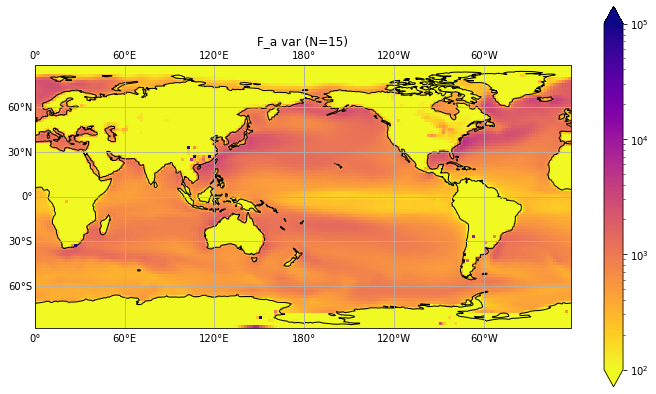

In [25]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
F_a.var('time').mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=10**2, vmax=10**5, cmap='plasma_r', 
                                  norm=matplotlib.colors.LogNorm())
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('F_a var (N=15)')

# Ocean forcing

In [19]:
F_o = Qo_prime + lambda_o*T_prime

Text(0.5, 1.0, 'F_o var (N=15)')

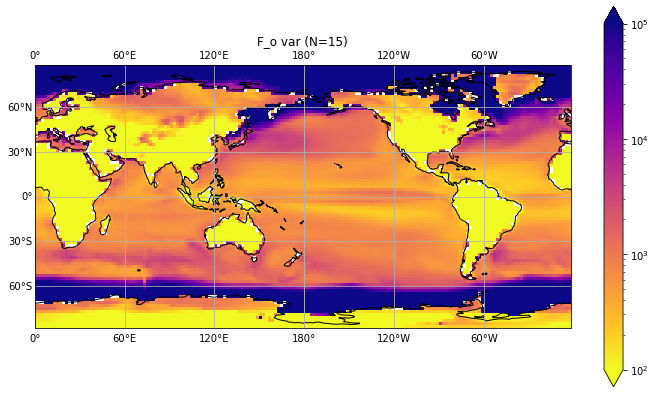

In [26]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
F_o.var('time').mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=10**2, vmax=10**5, cmap='plasma_r', 
                                  norm=matplotlib.colors.LogNorm())
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('F_o var (N=15)')

# Forcing ratio

In [43]:
r = F_o.std('time')/F_a.std('time')

Text(0.5, 1.0, 'sigma_o/sigma_a (N=15)')

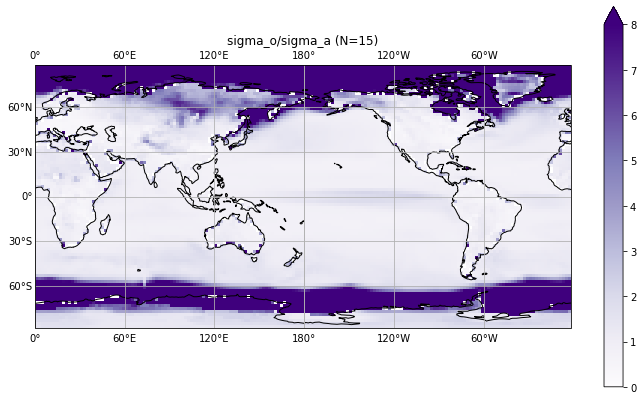

In [44]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
r.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Purples', vmin=0, vmax=8)
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('sigma_o/sigma_a (N=15)')

# 5 year surface temperature variance

In [24]:
T_5year = dataarray_SST_cont.rolling(time=60, center=True).mean('time')
T_var = T_5year.var('time')

Text(0.5, 1.0, 'SST Variance (N=15)')

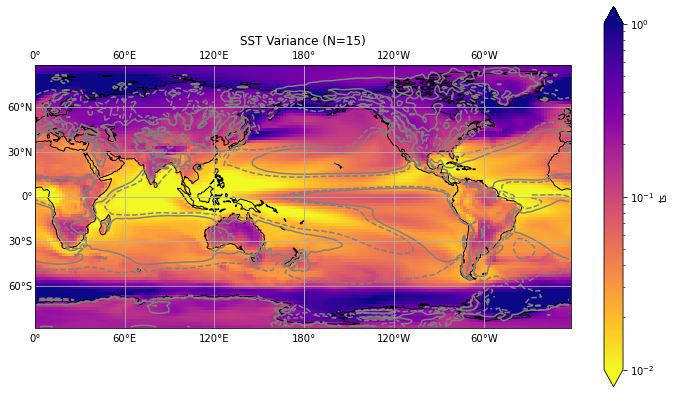

In [25]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_var.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma_r', vmin=0.01, vmax=1.0, norm=matplotlib.colors.LogNorm())
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.gridlines(draw_labels=True)
plt.title('SST Variance (N=15)')

# 25 year surface temperature variance

In [3]:
T_25year = dataarray_SST_cont.rolling(time=300, center=True).mean('time')
T_var_25yr = T_25year.var('time')

Text(0.5, 1.0, 'SST Variance (N=15)')

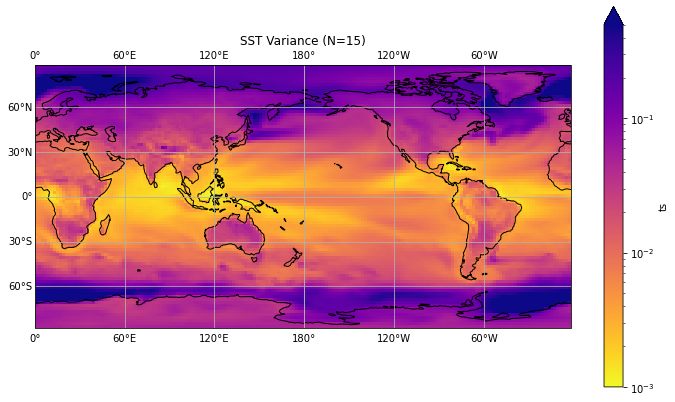

In [11]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_var_25yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0.001, vmax=0.5, cmap='plasma_r', norm=matplotlib.colors.LogNorm())
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
plt.title('SST Variance (N=15)')

Text(0.5, 1.0, 'SST Variance (N=15)')

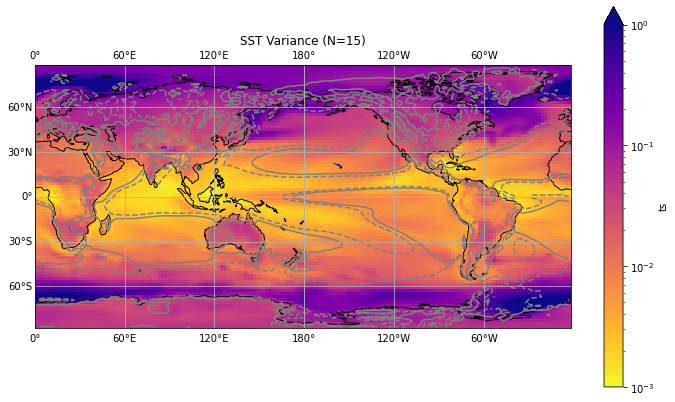

In [22]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_var_25yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma_r', vmin=0.001, vmax=1.0, norm=matplotlib.colors.LogNorm())
ax.coastlines(color='black', linewidth=1)
ax.gridlines(draw_labels=True)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
plt.title('SST Variance (N=15)')

# 25 year surface temperature standard deviation

In [12]:
T_25year = dataarray_SST_cont.rolling(time=300, center=True).mean('time')
T_std_25yr = T_25year.std('time')

Text(0.5, 1.0, 'SST Standard Dev. (N=15)')

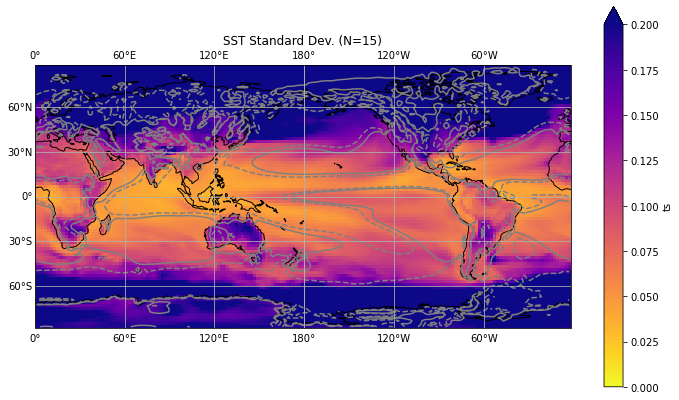

In [86]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_std_25yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, vmax=0.2, cmap='plasma_r')
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.gridlines(draw_labels=True)
plt.title('SST Standard Dev. (N=15)')

In [9]:
T_minusone_prime.sel(lon=40, method='nearest').sel(lat=30, method='nearest').isel(time=1)

<xarray.DataArray 'ts' (name: 15)>
array([-0.45289353, -1.34562698, -0.1633305 , -1.24697961,  0.18492493,
        0.77740449, -1.0019177 ,  0.64953175, -3.88695947,  0.73874484,
       -0.12968525,  0.46921489, -0.23772624, -0.9950745 ,  1.36139865])
Coordinates:
    time     datetime64[ns] 1851-02-28
    lat      int64 31
    lon      int64 41
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'MIROC6' 'FGOALS-g3'
    month    int64 2

In [12]:
T_prime.sel(lon=40, method='nearest').sel(lat=30, method='nearest').isel(time=0)

<xarray.DataArray 'ts' (name: 15)>
array([-0.45289353, -1.34562698, -0.1633305 , -1.24697961,  0.18492493,
        0.77740449, -1.0019177 ,  0.64953175, -3.88695947,  0.73874484,
       -0.12968525,  0.46921489, -0.23772624, -0.9950745 ,  1.36139865])
Coordinates:
    time     datetime64[ns] 1851-01-31
    lat      int64 31
    lon      int64 41
  * name     (name) object 'GFDL-CM4' 'GFDL-ESM4' ... 'MIROC6' 'FGOALS-g3'
    month    int64 1

# Checking where covariances couldn't be calculated

In [33]:
error_array = xr.DataArray(np.zeros((88,179)), dims=['lat', 'lon'])
error_array.coords['lat'] = dataarray_SST_cont['lat'].values
error_array.coords['lon'] = dataarray_SST_cont['lon'].values

In [79]:
list_error = [ [-35,137], [-31,37], [-31,49], [-27,49], [-27,69], [-27,161], [-27,169], [-27,173], [-27,325], [-23,41], 
             [-23,61], [-23,69], [-23,81], [-23,97], [-23,105], [-23,169], [-23,173], [-23,205], [-19,57], [-19,65], [-19,97],
             [-19,101],[-19,105],[-19,109],[-19,189],[-19,193],[-19,197],[-19,205],[-19,209],[-19,217],[-19,221],[-19,225],
             [-19,325],[-19,329],[-15,5],[-15,117],[-15,185],[-15,193],[-15,201],[-15,209],[-15,213],[-15,217],[-15,221],
             [-15,233],[-15,237],[-15,241],[-15,257],[-15,261],[-15,265],[-15,329],[-15,333],[-15,341],[-11,1],[-11,9],
             [-11,109],[-11,113],[-11,121],[-11,153],[-11,161],[-11,165],[-11,169],[-11,173],[-11,181],[-11,185],[-11,197],
             [-11,205],[-11,209],[-11,213],[-11,217],[-11,329],[-11,341],[-7,101],[-7,105],[-7,165],[-7,173],[-7,177],[-7,181],
             [-7,197],[-3,97],[-3,185],[-3,189],[-3,193],[1,1],[1,5],[1,77],[1,81],[1,85],[1,93],[1,97],[5,85],[5,157],[5,165],
             [5,317],[5,341],[5,345],[5,349],[9,69],[9,89],[9,113],[9,133],[9,137],[9,145],[9,153],[9,161],[9,173],[9,177],
             [9,181],[9,185],[9,189],[9,193],[9,197],[9,205],[9,209],[9,217],[9,221],[9,229],[9,233],[9,245],[9,321],[13,137],
             [13,237],[13,241],[13,249],[13,253],[13,257],[13,265],[13,317],[13,321],[13,337],[17,69],[17,93],[17,129],[17,133],
             [17,137],[17,157],[17,161],[17,177],[17,181],[17,221],[17,245],[17,257],[17,289],[17,297],[17,301],[17,305],
             [17,309],[17,313],[17,317],[17,321],[17,325],[17,329],[21,137],[21,141],[21,145],[21,149],[21,153],[21,161],
             [21,165],[21,169],[21,173],[21,185],[21,189],[21,217],[21,237],[21,245],[21,249],[21,301],[21,305],[21,309],
             [21,313],[21,325],[25,149],[25,165],[25,169],[25,201],[25,241],[25,297],[25,301],[29,289],[29,293],[41,233],
             [41,293],[45,233],[45,309],[49,353],[53,177],[53,225],[53,333],[57,189],[65,337],[73,13],[85,33],[85,45]]

Text(0.5, 1.0, 'sigma_o/sigma_a - CanESM5')

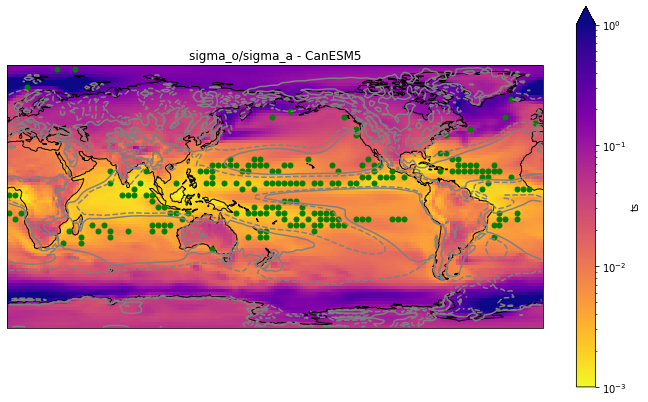

In [82]:
fig = plt.figure(figsize=(12,7))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_var_25yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='plasma_r', vmin=0.001, vmax=1.0, norm=matplotlib.colors.LogNorm())
for latlon in list_error:
    plt.plot(latlon[1], latlon[0], marker='o',color='g', markersize=5, transform=ccrs.PlateCarree())
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.set_title('SST Variance - CanESM5')

Text(0.5, 1.0, 'SST Standard Dev. (N=15)')

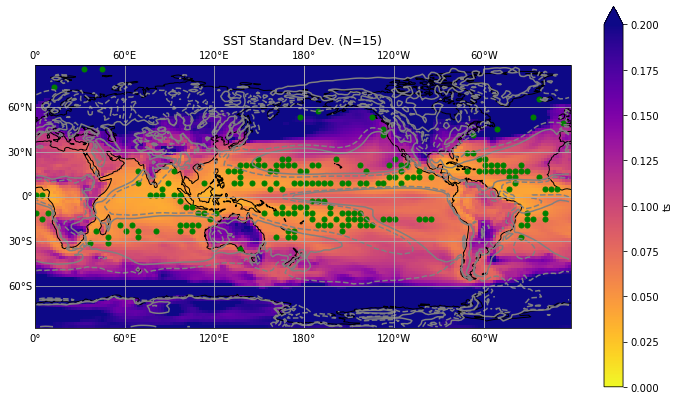

In [84]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
T_std_25yr.mean('name').plot(ax=ax, transform=ccrs.PlateCarree(), vmin=0, vmax=0.2, cmap='plasma_r')
for latlon in list_error:
    plt.plot(latlon[1], latlon[0], marker='o',color='g', markersize=5, transform=ccrs.PlateCarree())
ax.coastlines(color='black', linewidth=1)
vert_ds.plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors='#808080', levels=[-0.005,0.005])
ax.gridlines(draw_labels=True)
plt.title('SST Standard Dev. (N=15)')